## Dimensionality Reduction

- ***Dimensionality reduction;*** Alternative way to reduce the complexity of the model and avoid overfitting.
    - ***Feature selection;*** Select a subset of the original features.
    - ***Feature extraction;*** Derive information from the feature set to construct a new feature subspace.
    
    
- **Principal component analysis (PCA)** for unsupervised data compression.
- **Linear Discriminant Analysis (LDA)** as a supervised dimensionality reduction technique for maximizing class separability
- Nonlinear dimensionality reduction via **kernal principal component analysis**
---

#### Principal Component Analysis (PCA)

1. Standardize the d-dimensional dataset.
2. Construct the covariance matrix.
3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
4. Select k eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace ( k < d )
5. Construct a projection matrix, 'W' from the "top" k eigenvectors
6. Transform the d-dimensional input dataset 'X' using the projection matrix 'W' to obtain the new k-dimensional feature subspace

#### Step 1 - Preprocessing

In [21]:
import pandas as pd

# Load the Wine dataset
#df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine = pd.read_csv('data.csv', header=None)

In [23]:
# Process the data into separate training and test sets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize 
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#### Step 2 - Constructing the covariance matrix

In [24]:
# Obtain the eigenpairs of the Wine covariance matrix
import numpy as np

# Compute the covariance matrix of the standardized training set
cov_mat = np.cov(X_train_std.T)

# Eigendecomposition that yields a vector, eigen_vals, and a matrix, eigen_vecs
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


#### Step 3 - Decompress

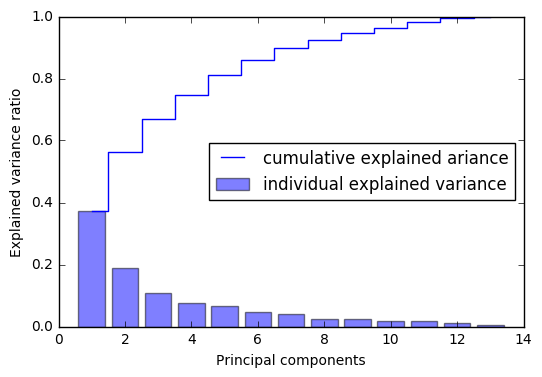

In [25]:
# Select subset of eigenvectors (Principal components) that contains most of the information (variance)
tot = sum(eigen_vals)

# Sort eigenvalues by decreasing magnitude; select top k
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

# Calculate the cumulative sum of explained variances
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained ariance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

#### Step 4 - Select k 

In [26]:
# Sorting the eigenpairs by decreasing order of the eigenvalues
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

eigen_pairs.sort(reverse=True)

#### Step 5 - Construct 'W'

In [27]:
# Select two eigenvectors that correspond to the two largest values. (Selecting 2 is an example) (13x2 matrix)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))

print('Matrix W:\n', w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [28]:
# Transofrm a sample x onto the PCA subspace
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

#### Step 6 - Obtain new k-dimensional subspace

In [29]:
# Transform the entire 124x13 dimensional training dataset onto the two principal components (matrix dot product)
X_train_pca = X_train_std.dot(w)

#### Visaulize the transformed Wine dataset

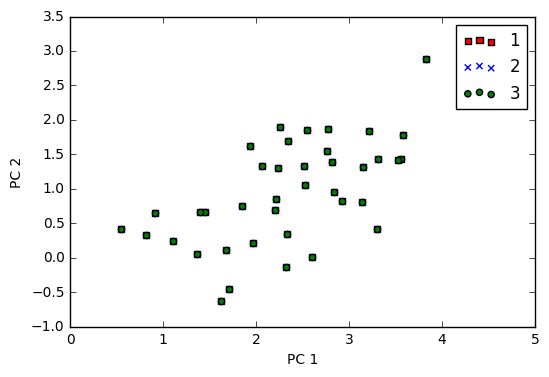

In [32]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==1, 0], 
                X_train_pca[y_train==1, 1], 
                c=c, label=l, marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.show()

#TODO: Visual is incorrect, need to investigate

## Principal Component Analysis (PCA) in scikit-learn

In [15]:
# Plotting Function

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                          np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all the samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=c1)
        
    # highlight the test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')
    

#### Using sklearn for PCA

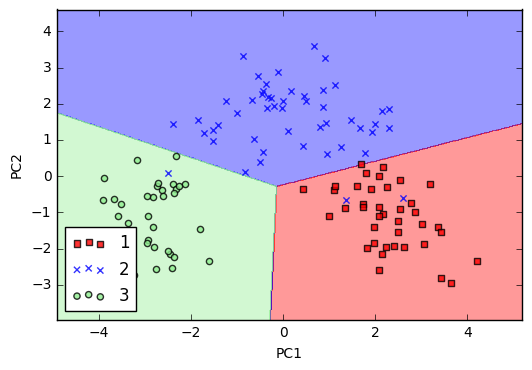

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression()

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

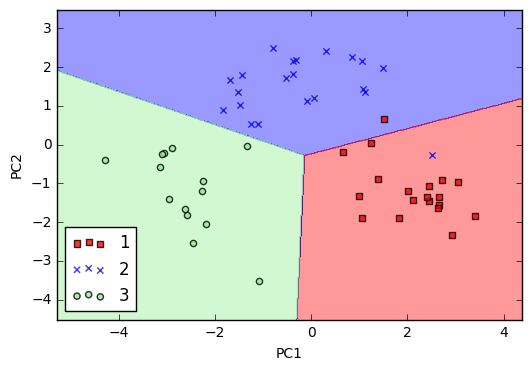

In [19]:
# Plot regions on test dataset
plot_decision_regions(X_test_pca, y_test, classifier=lr)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()